In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imdb import Cinemagoer
import time

In [2]:
df1 = pd.read_csv("movies.csv") # movies from 1970 to 2013
df2 = pd.read_csv("Bechdel_detailed.csv") # movies from 1874 to 2021

In [3]:
# removing unwanted columns, renaming columns etc to be able to concat the dfs together

df1.rename(columns={"budget_2013$": "budget_2013", "domgross_2013$": "domgross_2013", 
                    "intgross_2013$": "intgross_2013"}, inplace=True)
df2.rename(columns = {"Unnamed: 0": "unnamed"}, inplace=True)
df2.drop(labels=["dubious", "submitterid", "visible", "date", "unnamed"], axis=1, inplace=True)

df1.drop(columns=["period code", "decade code", "test"], inplace=True)


In [4]:
# loop through the imdb id column to remove the "tt" in front of each id
mov_id = []
for i in df1.imdb:
    mov_id.append(i.replace("tt", ""))

#putting the output from the for loop into a dataframe
movs = pd.DataFrame(mov_id, columns=["imdb_id"])

# join the movs column with cleaned ids to df1 and replacing the previous imdb columns w/ it
df1 = df1.join(movs)
df1["imdb"] = df1["imdb_id"]
df1.drop(columns="imdb_id")
df1["imdb"] = df1["imdb"].astype(float)

In [5]:
md = pd.concat([df1, df2]) # new dataframe consisting of df1 and df2!

In [6]:
# search for duplicates. this showed that no duplicates exist because of the movie is in both datasets
# rather, there were duplicate items in df2. therefore they could be dropped immediately
md.loc[md.duplicated(keep=False)]
dupe = md.duplicated(keep="first")
md = md[~dupe]

In [7]:
# putting the imdb id columns together
md["imdb"] = md["imdbid"]
md.drop(columns="imdbid")
md.imdbid.fillna(md.imdb_id, inplace=True)
md["imdb"] = md["imdbid"]
md.drop(columns=["imdb_id", "imdbid"], inplace=True)

In [8]:
# cleaning the ratings/binary columns
md.rating.fillna(md.binary, inplace=True)
md.rating.replace({3.0: "PASS", 2.0: "FAIL", 1.0: "FAIL", 0.0: "FAIL"}, inplace=True)
# fill binary + replace with numeric values to calculate correlation
md.binary.fillna(md.rating, inplace=True)
md.binary.replace({"PASS": 1, "FAIL": 0}, inplace=True)

In [9]:
# misc cleaning 
md.year=md.year.astype(int)
md["title"] = md["title"].str.replace('[^a-zA-Z0-9 ]', '')
md.fillna("-")

/var/folders/lz/k_d_bqg17c1b10f10n3wv1l00000gn/T/ipykernel_1294/2176415908.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  md["title"] = md["title"].str.replace('[^a-zA-Z0-9 ]', '')


,year,imdb,title,clean_test,binary,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,rating,id
0,2013,1711425,21 amp Over,notalk,0,13000000.0,25682380.0,42195766.0,2013FAIL,13000000.0,25682380.0,42195766.0,FAIL,-
1,2012,1343727,Dredd 3D,ok,1,45000000.0,13414714.0,40868994.0,2012PASS,45658735.0,13611086.0,41467257.0,PASS,-
2,2013,2024544,12 Years a Slave,notalk,0,20000000.0,53107035.0,158607035.0,2013FAIL,20000000.0,53107035.0,158607035.0,FAIL,-
3,2013,1272878,2 Guns,notalk,0,61000000.0,75612460.0,132493015.0,2013FAIL,61000000.0,75612460.0,132493015.0,FAIL,-
4,2013,0453562,42,men,0,40000000.0,95020213.0,95020213.0,2013FAIL,40000000.0,95020213.0,95020213.0,FAIL,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9367,2021,2953050.0,Encanto,-,1,-,-,-,-,-,-,-,PASS,10151.0
9368,2021,10752004.0,Love Hard,-,0,-,-,-,-,-,-,-,FAIL,10152.0
9370,2021,3581652.0,West Side Story,-,1,-,-,-,-,-,-,-,PASS,10157.0
9371,2021,15943414.0,Every Time a Bell Rings,-,1,-,-,-,-,-,-,-,PASS,10158.0


In [10]:
# creating datasets to use for the blockbuster analysis
bb_billion = md.loc[(md['intgross'] > 1000000000)] #movies with int gross above $1bn
bb_500mil = md.loc[(md['intgross'] > 500000000)] #movies with int gross above $500m

## some graphs!

### blockbuster analysis

<AxesSubplot:title={'center':'PASS/FAIL ratio per year\n for blockbusters'}, xlabel='year', ylabel='intgross'>

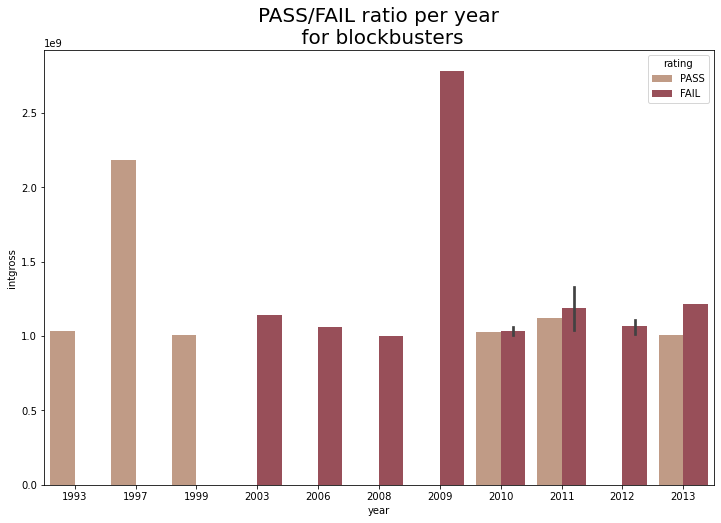

In [110]:
plt.figure(figsize=(12,8))
plt.title(label="PASS/FAIL ratio per year\n for blockbusters", fontsize=20)
sns.set_palette("twilight_r")
sns.barplot(data=bb_billion, x="year", y="intgross", hue="rating")

In [12]:
bb_billion.title = bb_billion.title.str.replace('[^a-zA-Z0-9 ]', '').str.replace("39", "´") 
bb_billion.loc[(bb_billion['year'] < 2009) & (bb_billion['year'] > 2002)]

/var/folders/lz/k_d_bqg17c1b10f10n3wv1l00000gn/T/ipykernel_1294/1467281294.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  bb_billion.title = bb_billion.title.str.replace('[^a-zA-Z0-9 ]', '').str.replace("39", "´")
/Users/nikigiarimi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,year,imdb,title,clean_test,binary,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,rating,id
634,2008,0468569,The Dark Knight,dubious,0,185000000.0,533345358.0,1.002891e+09,2008FAIL,200217418.0,577216380.0,1.085386e+09,FAIL,NaN
782,2006,0383574,Pirates of the Caribbean Dead Man´s Chest,men,0,225000000.0,423315812.0,1.060616e+09,2006FAIL,260054178.0,489266869.0,1.225856e+09,FAIL,NaN
1060,2003,0167260,The Lord of the Rings The Return of the King,notalk,0,94000000.0,377845905.0,1.141409e+09,2003FAIL,119012174.0,478385772.0,1.445123e+09,FAIL,NaN


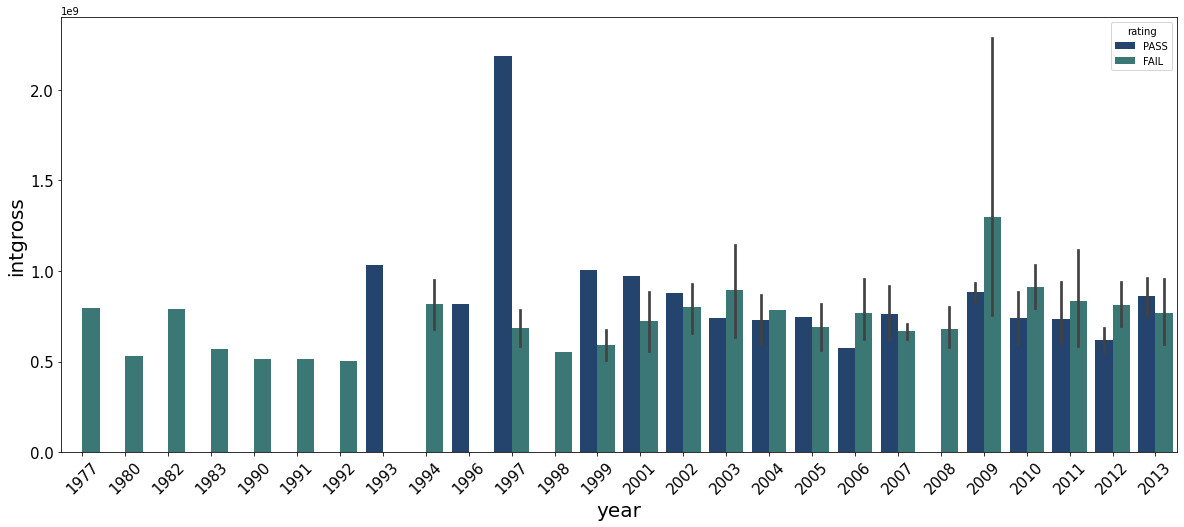

In [13]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)

sns.set_palette("gist_earth")
sns.barplot(data=bb_500mil, x="year", y="intgross", hue="rating")
plt.show()

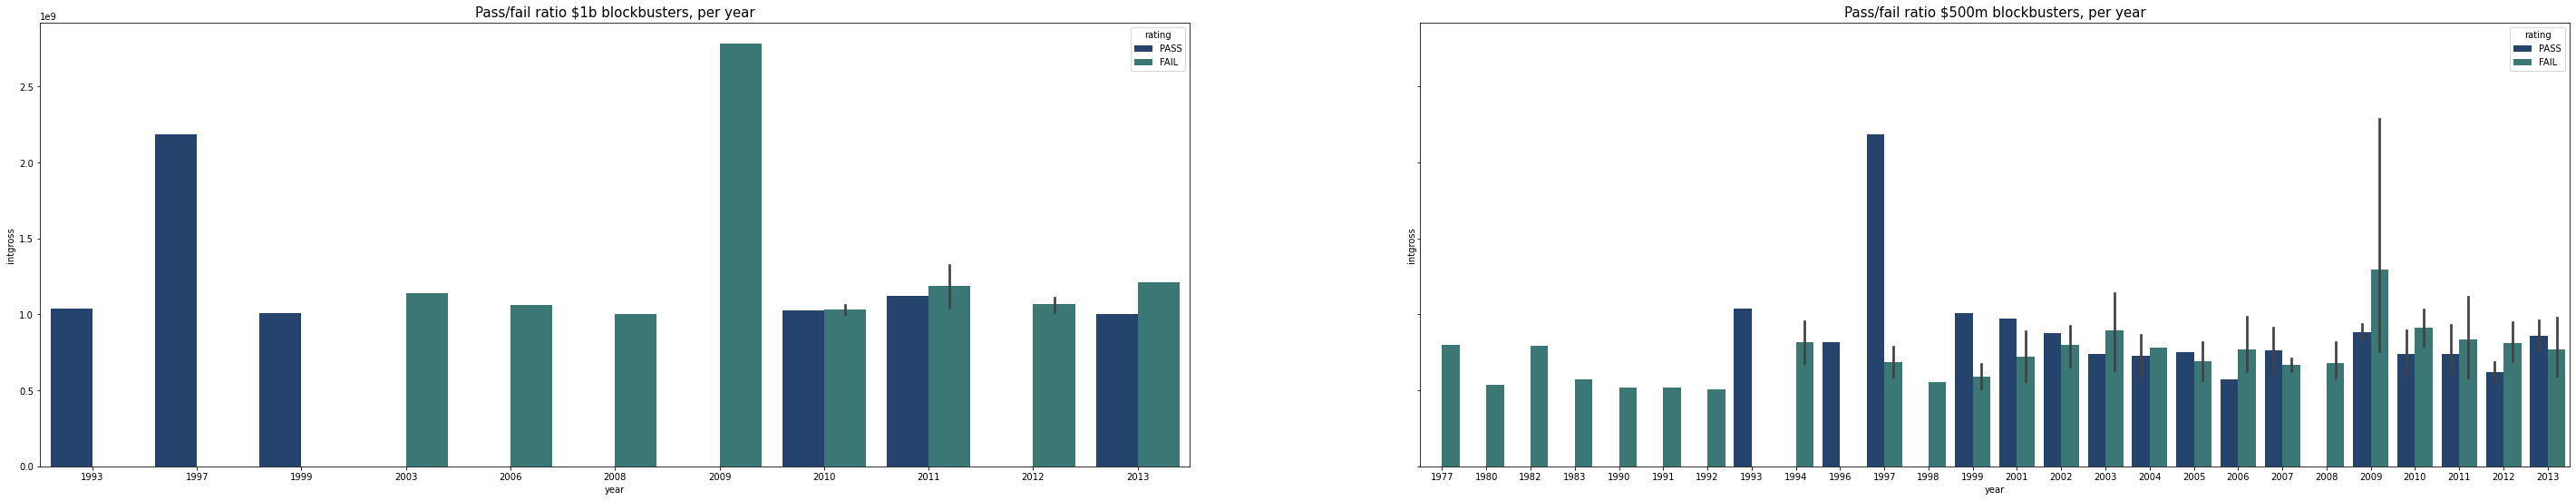

In [14]:
# to see them with shared y-axis

fig, ax = plt.subplots(1,2, figsize=(50, 9), sharey=True)

sns.barplot(data=bb_billion, x="year", y="intgross", hue="rating", ax=ax[0])
ax[0].set_title("Pass/fail ratio $1b blockbusters, per year", fontsize=15)

sns.barplot(data=bb_500mil, x="year", y="intgross", hue="rating", ax=ax[1])
ax[1].set_title("Pass/fail ratio $500m blockbusters, per year", fontsize=15)

plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

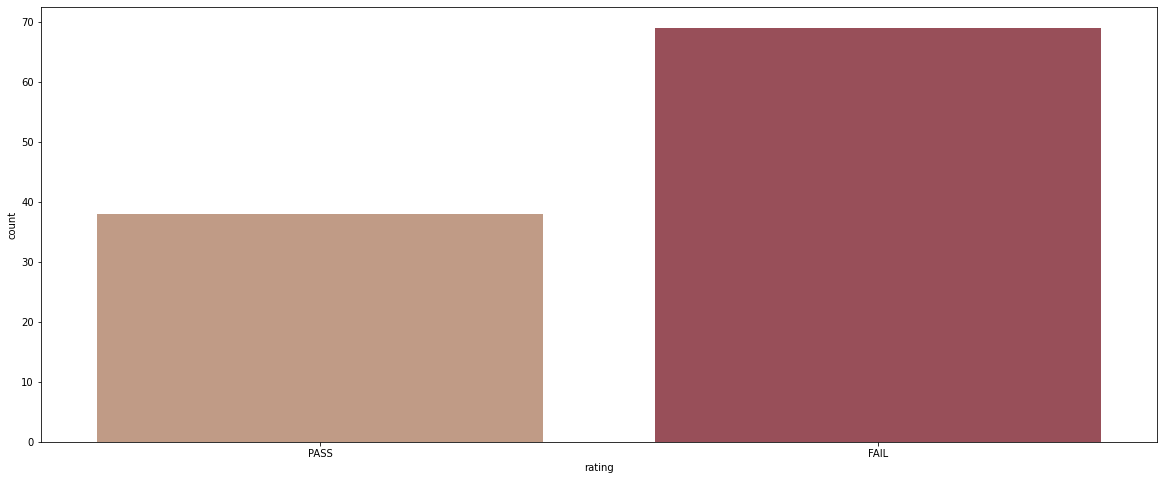

In [15]:
plt.figure(figsize=(20,8))
sns.set_palette("twilight_r")
sns.countplot(data=bb_500mil, x="rating")

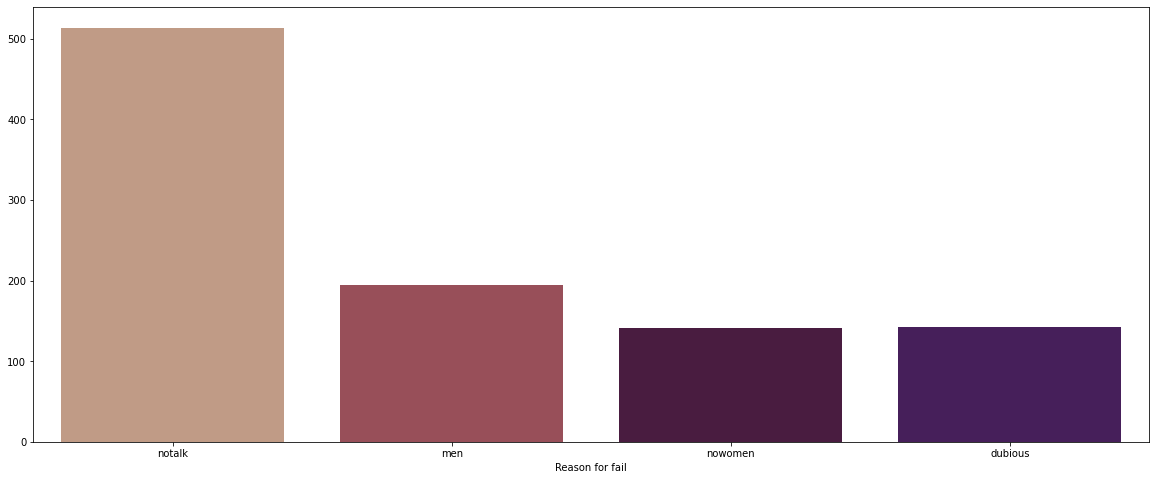

In [16]:
# to see the distribution of which criteria a movie failed on, without the "ok"/pass category
no_ok = df1[df1.clean_test != "ok"]

plt.figure(figsize=(20,8))

ax = sns.countplot(data=no_ok, x="clean_test")
ax.set(xlabel='Reason for fail', ylabel='')

plt.show()


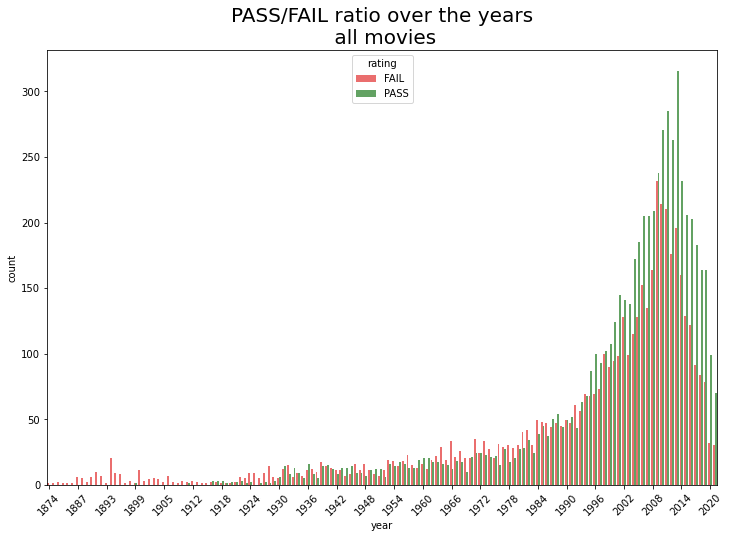

In [111]:
x = [i for i in range(0,140)]
labels = [i for i in range(1874,2023,10)]

plt.figure(figsize=(12,8))
plt.title(label="PASS/FAIL ratio over the years\n all movies", fontsize=20)
sns.countplot(data=md, x="year", hue="rating" , palette=dict(FAIL = 'r', PASS = 'g'), alpha = 0.65)
plt.margins(x=0)
plt.xticks(ticks = x[::6], rotation=45)
plt.show()

In [18]:
# creating a temporary dataframe identical to the main df to get correlation for only the columns we want
temp = md
temp.drop(columns=["intgross_2013", "domgross_2013", "id"], inplace=True)

<AxesSubplot:>

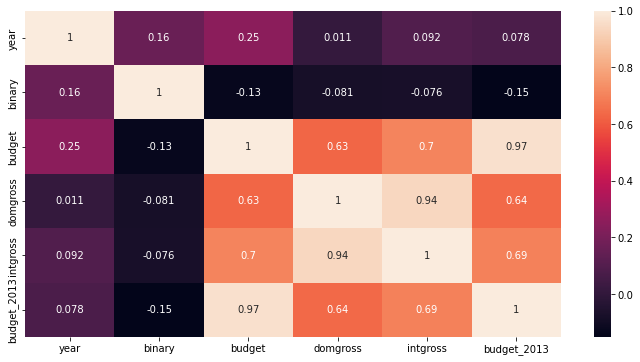

In [19]:
corr = temp.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)

## We can also add box office data from another source for the movies that came from df2
### NB! Due to disparities between df2 and df3, not all blockbusters are included. This is because they were not in the Bechdel movie list (df2) in the first place. New data may be available using the API.

In [21]:
df3 = pd.read_csv("boxoffice.csv") #importing a dataset with lifetime (domestic) gross for movies after 2013 

In [48]:
gross = pd.merge(md, df3, on="title") #merging it with the dataset that lacked this information (1874-2021 data)
gross.reset_index

In [52]:
# removing duplicates
gross_d = gross.duplicated(subset="title")
gross = gross[~gross_d]
#some misc cleaning
gross.drop(columns= ["studio", "rank", "year_y"], inplace=True)
gross["year"] = gross["year_x"]